In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# Data source analysis

In this notebook, we will explain the process of collecting and curating the data used for the analysis. As different dataset from different sources were available, this data needed to be checked in their consistency and than manipulated into a format that can be used for indeep analysis.

In looking for data, we search for trustful sources and, where possible, compare different sources to check if data are reliable. 

For the purpose of the analysis, we can start using monthly aggregate data and later on, daily for more specific insights. When dealing with a data driven research analysis, it is a good practice to approach it in an iterative way: we start with more general data and if our analysis as we gain more insights, we drill down to more granular data. 

Summing up, the main objectives of the data source analysis an manipulation section is to:
- check the datasources in terms of what data might be more useful.
- manipulate the dataset and transform them in a format that can be used for later analysis.

## Met Office Website

> Website: [Met Office Website, UK and regional series](https://www.metoffice.gov.uk/research/climate/maps-and-data/uk-and-regional-series)

From the UK and regional series webpage, this are the adopted criteria for downloading the data:
- Order: Year ordered statistics
- Region: England SE/Central S
- Parameter: Rainfall 

Header:
```
Areal values from HadUK-Grid 1km gridded climate data from land surface network
Source: Met Office National Climate Information Centre
Monthly, seasonal and annual total precipitation amount for England SE and Central S
Areal series, starting in 1836
Last updated 01-Jun-2025 11:46
```

In [2]:
data = pd.read_csv('./data/england_se_c.csv')
print(data.shape)
data.head()

(190, 18)


,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1836,67.7,59.0,103.1,90.7,21.5,39.9,65.1,64.4,94.8,126.1,100.0,60.1,---,215.3,169.4,320.9,892.3
1,1837,80.2,81.1,19.8,34.4,24.9,34.3,44.2,87.5,42.7,67.6,51.9,53.7,221.4,79.2,166.1,162.2,622.5
2,1838,12.9,58.1,37.6,22.7,28.6,91.8,44.0,37.9,85.9,68.5,122.8,69.1,124.7,88.9,173.7,277.3,679.9
3,1839,48.6,53.5,51.4,37.5,25.2,65.0,104.8,54.0,137.5,72.7,117.7,108.1,171.1,114.1,223.7,327.9,876.0
4,1840,87.0,49.3,7.6,5.0,53.2,34.0,59.9,49.9,82.8,38.9,121.6,12.7,244.5,65.8,143.8,243.3,601.9


In [3]:
# checking the columns name
data.columns

Index(['year', '   jan', '    feb', '    mar', '    apr', '    may', '    jun',
       '   jul', '   aug', '   sep', '   oct', '   nov', '   dec', '    win',
       '    spr', '    sum', '    aut', '    ann'],
      dtype='object')

In [4]:
# checking columns data types
data.dtypes

year         int64
   jan     float64
    feb    float64
    mar    float64
    apr    float64
    may    float64
    jun     object
   jul      object
   aug      object
   sep      object
   oct      object
   nov      object
   dec      object
    win     object
    spr    float64
    sum     object
    aut     object
    ann     object
dtype: object

- The columns names contain some empty characters that need to be strip
- Some columns are loaded as `object` type due to some `nan`s or special characters. They have to be converted into `float` type.

In [5]:
data.columns = data.columns.str.strip()
string_columns = data.select_dtypes(include=['object']).columns
data[string_columns] = data[string_columns].apply(pd.to_numeric, errors='coerce')

In [6]:
print(data.shape)
data.head()

(190, 18)


,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1836,67.7,59.0,103.1,90.7,21.5,39.9,65.1,64.4,94.8,126.1,100.0,60.1,NaN,215.3,169.4,320.9,892.3
1,1837,80.2,81.1,19.8,34.4,24.9,34.3,44.2,87.5,42.7,67.6,51.9,53.7,221.4,79.2,166.1,162.2,622.5
2,1838,12.9,58.1,37.6,22.7,28.6,91.8,44.0,37.9,85.9,68.5,122.8,69.1,124.7,88.9,173.7,277.3,679.9
3,1839,48.6,53.5,51.4,37.5,25.2,65.0,104.8,54.0,137.5,72.7,117.7,108.1,171.1,114.1,223.7,327.9,876.0
4,1840,87.0,49.3,7.6,5.0,53.2,34.0,59.9,49.9,82.8,38.9,121.6,12.7,244.5,65.8,143.8,243.3,601.9


## Data Dictionary

- `year`: year - integer
- `jan` to `dec`: months - string
- `win`: winter - float. The months considered for the `win` variable are `dec`, `jan` and `feb` (rolling in the new year)
- `spr`: spring - float. The months considered for the `spr` variable are `mar`, `apr` and `may`
- `sum`: summer - float. The months considered for the `sum` variable are `jun`, `jul` and `aug`
- `aut`: autumn - float. The months considered for the `aut` variable are `sep`, `oct` and `nov`
- `ann`: annual - flost. Annual sum of precipitation.

In [7]:
# Checking the assumption that season variables are the sum of particular months

## taking a sampled example row from the dataset 
data_sample = data.sample(1, random_state=123)
data_sample

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
77,1913,111.4,28.8,75.3,81.0,52.8,16.0,49.5,40.4,64.1,111.0,84.6,40.8,240.2,209.1,105.9,259.7,755.7


In [8]:
# checking winter value
previous_year = data[data['year'] == data_sample['year'].values[0]-1]['dec'].values[0]
current_year = data[data['year'] == data_sample['year'].values[0]][['jan', 'feb']].sum(axis=1).values[0]
previous_year+current_year

240.20000000000002

In [9]:
# checking spring value
data[data['year'] == data_sample['year'].values[0]][['mar', 'apr', 'may']].sum(axis=1)

77    209.1
dtype: float64

In [10]:
# checking summer
data[data['year'] == data_sample['year'].values[0]][['jun', 'jul', 'aug']].sum(axis=1)

77    105.9
dtype: float64

In [11]:
# checking autumn
data[data['year'] == data_sample['year'].values[0]][['sep', 'oct', 'nov']].sum(axis=1)

77    259.7
dtype: float64

In [12]:
# checking annual 
cols = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
data[data['year'] == data_sample['year'].values[0]][cols].sum(axis=1)

77    755.7
dtype: float64

The dataframe consists now of 18 columns, for the purpose of our analysis, is more convenient to transform the dataframe from [wide to long](https://www.theanalysisfactor.com/wide-and-long-data/). We will just consider the data for each month, dropping `win`, `spr`, `sum`, `aut` and `ann` variables. I will recreate the season variable later.

For the purpose of the analysis, we will generate the following dataframe and function:
- `rainfall_data_se` dataframe, containing monthly rainfall quantity in mm for each yeart starting from January 1836 to May 2025 included
- `rainfall_se` dataframe, containing yearly aggreagate data: the sum, mean, standard deviation, median, minimum and maximal values for each year
- `rainfall_se_jan_to_may` dataframe, containing yearly aggregate data considering only months from January to May included 
- `sort_and_highlight_dataframe` function, to rank the years/months based on selected features and highlight rows based on conditions.

In [13]:
rainfall_data_se = data[['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                         'jul', 'aug', 'sep','oct', 'nov', 'dec']].melt(id_vars='year',
                                                                        var_name='month', 
                                                                        value_name='value').sort_values(by='year')
rainfall_data_se['month'] = pd.Categorical(rainfall_data_se['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                                                                                  'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)
rainfall_data_se.rename(columns={'value': 'rainfall'}, inplace=True)

# creating a column containing the season
conds=[
    rainfall_data_se['month'].isin(['mar', 'apr', 'may']),
    rainfall_data_se['month'].isin(['jun', 'jul', 'aug']),
    rainfall_data_se['month'].isin(['sep', 'oct', 'nov']),
    rainfall_data_se['month'].isin(['dec', 'jan', 'feb'])
]
choices=['spring', 'summer', 'autumn', 'winter']
rainfall_data_se['season'] = np.select(conds, choices, default='unknown')
rainfall_data_se.head()

,year,month,rainfall,season
0,1836,jan,67.7,winter
570,1836,apr,90.7,spring
380,1836,mar,103.1,spring
1330,1836,aug,64.4,summer
1900,1836,nov,100.0,autumn


In our analysis, we want to calculate the yearly precipitation values considering a 12 months window that do not start from January but from a selected month, e.g. June. the function `assign_weather_year` assign `weather_year` variable to each row (i.e. for each month).

In [14]:
# Function to assign water year (June to May)

def assign_weather_year(row):
    month = row['month'].lower()
    year = row['year']
    
    # June to December belong to the water year starting in that calendar year
    if month in ['jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']:
        return year
    # January to May belong to the water year that started in the previous calendar year
    else:  # jan, feb, mar, apr, may
        return year - 1

# Apply the function to create water year column
# df_temp = df.copy()
rainfall_data_se['assign_weather_year'] = rainfall_data_se.apply(assign_weather_year, axis=1)
rainfall_data_se.head()

,year,month,rainfall,season,assign_weather_year
0,1836,jan,67.7,winter,1835
570,1836,apr,90.7,spring,1835
380,1836,mar,103.1,spring,1835
1330,1836,aug,64.4,summer,1836
1900,1836,nov,100.0,autumn,1836


In [15]:
rainfall_data_se.to_pickle("./data/rainfall_data_se.pkl")

For each year, we can group data by year and calculate main descriptive statistics, i.e. sum, mean, standard deviation, medina, minimum and maxim values for each year.

In [16]:
rainfall_se = (rainfall_data_se
 .groupby('year')
 .agg(
    total_rainfall=('rainfall', 'sum'),
    avg_rainfall=('rainfall', 'mean'),
    std_rainfall=('rainfall', 'std'),
    median_rainfall = ('rainfall', 'median'),
    max_rainfall=('rainfall', 'max'),
    min_rainfall=('rainfall', 'min')
  )
  .round(1)
 ).reset_index()


In [17]:
rainfall_se

,year,total_rainfall,avg_rainfall,std_rainfall,median_rainfall,max_rainfall,min_rainfall
0,1836,892.4,74.4,29.4,66.4,126.1,21.5
1,1837,622.3,51.9,22.7,48.0,87.5,19.8
2,1838,679.9,56.7,32.3,51.0,122.8,12.9
3,1839,876.0,73.0,35.4,59.5,137.5,25.2
4,1840,601.9,50.2,34.7,49.6,121.6,5.0
...,...,...,...,...,...,...,...
185,2021,807.1,67.3,38.2,67.3,137.2,10.0
186,2022,751.6,62.6,50.9,46.7,189.3,5.6
187,2023,1017.8,84.8,45.6,84.2,160.8,7.2
188,2024,991.9,82.7,39.9,77.8,157.4,18.3


We can now save the data as `.pkl` file for later use.

In [18]:
rainfall_se.to_pickle("./data/rainfall_se.pkl")

In [19]:
# from src.data_plotting import plot_rainfall

In our analysis, we are interested in ranking the different year, month or season based on rainfall feature we are interested. The goal here is to implement a function sorting the row of a dataframe and then present a table with columns of interest and highlighting years of interest for aggreagated data.

> example: In the last 15 years, 2024 was the 4<sup>th</sup> highest year in terms of total rainfall with 991.9mm in twelve months.

In [20]:
sorted_dataframe = rainfall_se[(rainfall_se['year']>=2010) & (rainfall_se['year'] <= 2024)].sort_values('total_rainfall', ascending=False).reset_index(drop=True)
# sorted_dataframe['Year'] = sorted_dataframe['year'].astype(str)+'-'+(sorted_dataframe['year']+1).astype(str).str[-2:]
sorted_dataframe['Rank'] = sorted_dataframe.index + 1
index_2024 = sorted_dataframe[sorted_dataframe['year'] == 2024].index[0]


# Highlight specific rows (e.g., rows 1 and 3)
def highlight_rows(s):
    return ['background-color: #2d5a87' if s.name in [index_2024] else '' for _ in s]

sorted_dataframe[['year', 'Rank', 'total_rainfall', 'avg_rainfall', 'median_rainfall']].style.hide(axis='index').apply(highlight_rows, axis=1)

year,Rank,total_rainfall,avg_rainfall,median_rainfall
2014,1,1039.000000,86.600000,74.700000
2023,2,1017.800000,84.800000,84.200000
2012,3,1005.700000,83.800000,84.600000
2024,4,991.900000,82.700000,77.800000
2020,5,900.300000,75.000000,59.600000
2019,6,859.000000,71.600000,59.500000
2021,7,807.100000,67.300000,67.300000
2013,8,805.700000,67.100000,54.600000
2018,9,758.300000,63.200000,60.800000
2022,10,751.600000,62.600000,46.700000


### Creating a function that automatically sort the dataframe and highlight desired rows

`sort_and_highlight_dataframe` is a function that display the first $n$ rows of a dataframe highlighting the rows containing data we want to compare or discuss. The function is implemented in the `data_manipulation.py` file in the `src` folder.

Let's test the function within different scenarios.

In [21]:
import importlib
from src.data_manipulation import sort_and_highlight_dataframe

In [22]:
import src.data_manipulation
importlib.reload(src.data_manipulation)
from src.data_manipulation import sort_and_highlight_dataframe


# Highlight multiple years
result = sort_and_highlight_dataframe(
    df=rainfall_se[rainfall_se['year'] > 2010],
    sort_column='total_rainfall',
    columns_to_display=['year', 'total_rainfall', 'avg_rainfall', 'min_rainfall'],
    highlight_condition={'year': [2024]},
    add_rank = False,
    n_rows=10  # Show only top 10
)

result

Year,Total Rainfall (mm),Average Rainfall (mm),Min (mm)
2014,1039.000000,86.600000,13.700000
2023,1017.800000,84.800000,7.200000
2012,1005.700000,83.800000,19.300000
2024,991.900000,82.700000,18.300000
2020,900.300000,75.000000,4.900000
2019,859.000000,71.600000,25.900000
2021,807.100000,67.300000,10.000000
2013,805.700000,67.100000,22.800000
2018,758.300000,63.200000,2.800000
2022,751.600000,62.600000,5.600000


In [23]:
# Visualizing the data with 2 conditions
# and setting the color background for that rows

result = sort_and_highlight_dataframe(
    df=rainfall_se[rainfall_se['year'] > 2010],
    sort_column='avg_rainfall',
    columns_to_display=['year', 'avg_rainfall', 'total_rainfall'],
    highlight_condition=[
        {'condition': {'year': 2025}, 'color': "#ad7712"},  # Recent years in red
        {'condition': {'year': 2022}, 'color': "#D44521"}           # 2010 in teal
    ],
    ascending=True,
    n_rows=7
)

result

Year,Rank,Average Rainfall (mm),Total Rainfall (mm)
2025,1,46.300000,231.300000
2011,2,52.600000,630.600000
2017,3,60.500000,726.100000
2016,4,60.800000,729.800000
2015,5,61.400000,737.300000
2022,6,62.600000,751.600000
2018,7,63.200000,758.300000


At least for year 2024, it doesn't look a particularly dry year. But what about considering also the the beginning of 2025? At first, I just considered the total precipitation per year, but what about the yearly monthly mean? In this way, I can also compare the latest data of 2025. 

### Months comparison

If we want to produce a month to month or group of months comparison, the best way is to create a dataframe that filter the months of interest.  

In fact, if we compare the mean of the rainfall of 2025 with respect the previous 15 years, we can see that this mean is considerly lower. But to make a meaningful comparison, we have to compare the mean of the first months with the mean of the first months for each year. So the next step is to compare the first 5 months of each year and see what the mean and meadian can tell us. 

So, if we want to calculate the rainfall of the first 5 months of each year to compare to the first 5 months of 2025, we will see that the monthly mean looks actually significantly (I am not saying *is* statistically significantly) lower than the previous year. But one could argue that we are just comparing the first 5 months of the year, it could just be that for the first 5 months of the year, each year, the mean might be lower than the rest of the year. 

In [24]:
months_compare = ['jan', 'feb', 'mar', 'apr', 'may']
rainfall_se_jan_to_may = (rainfall_data_se[rainfall_data_se['month'].isin(months_compare)]
                          .groupby('year')
                          .agg(
                              total_rainfall=('rainfall', 'sum'),
                              avg_rainfall=('rainfall', 'mean'),
                              median_rainfall=('rainfall', 'median'),
                              max_rainfall=('rainfall', 'max'),
                              min_rainfall=('rainfall', 'min')
                              )
                              ).reset_index()

rainfall_se_jan_to_may.head()

,year,total_rainfall,avg_rainfall,median_rainfall,max_rainfall,min_rainfall
0,1836,342.0,68.40,67.7,103.1,21.5
1,1837,240.4,48.08,34.4,81.1,19.8
2,1838,159.9,31.98,28.6,58.1,12.9
3,1839,216.2,43.24,48.6,53.5,25.2
4,1840,202.1,40.42,49.3,87.0,5.0


We can use the produced dataframe to compare the mean of rainfall in the first 5 months of each year in the last 15 years.

In [25]:
result = sort_and_highlight_dataframe(
    df=rainfall_se_jan_to_may[rainfall_se_jan_to_may['year'] > 2010],
    sort_column='avg_rainfall',
    columns_to_display=['year', 'avg_rainfall', 'median_rainfall', 'total_rainfall'],
    highlight_condition=[
        {'condition': {'year': 2025}, 'color': "#ad7712"},  # Recent years in red
        {'condition': {'year': 2022}, 'color': "#D44521"}           # 2010 in teal
    ],
    ascending=True,
    n_rows=7
)

result

Year,Rank,Average Rainfall (mm),Median Rainfall (mm),Total Rainfall (mm)
2022,1,40.500000,42.700000,202.500000
2011,2,41.020000,27.200000,205.100000
2019,3,41.740000,32.800000,208.700000
2025,4,46.260000,24.800000,231.300000
2017,5,50.120000,50.100000,250.600000
2015,6,51.960000,58.600000,259.800000
2012,7,54.220000,42.700000,271.100000


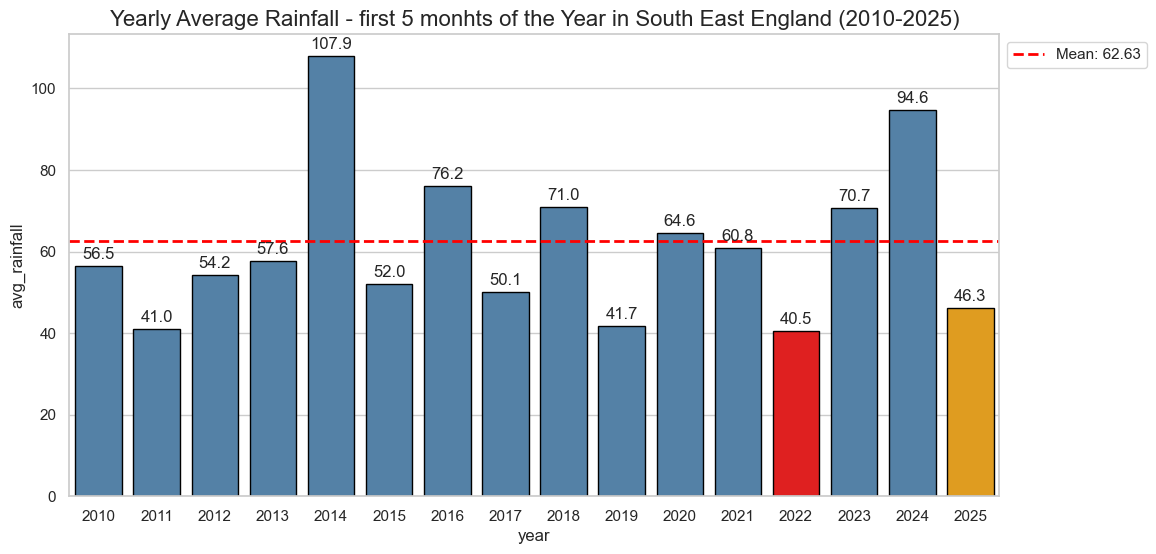

In [26]:
from src.data_plotting import plot_rainfall

start_year = 2010
latest_year = 2025
# special year = 2022 when hosepipe ban was issued
sp_year = 2022

plot_rainfall(rainfall_se_jan_to_may, 
              start_year, 
              latest_year, 
              feature='avg_rainfall', 
              special_year=sp_year, 
              title_label='Yearly Average Rainfall - first 5 monhts of the Year', 
              year_shift = False)

### Weather Year Analysis

As discussed in the analysis main notebook, we are interested in the amount of rainfall in a 12 month period starting from the end of the summer onward. The aggregate calculation will be used to compare different Weather Years.

In [28]:
rainfall_data_se.sort_values(['year', 'month']).tail(10)

,year,month,rainfall,season,assign_weather_year
569,2025,mar,6.8,spring,2024
759,2025,apr,24.8,spring,2024
949,2025,may,20.5,spring,2024
1139,2025,jun,NaN,summer,2025
1329,2025,jul,NaN,summer,2025
1519,2025,aug,NaN,summer,2025
1709,2025,sep,NaN,autumn,2025
1899,2025,oct,NaN,autumn,2025
2089,2025,nov,NaN,autumn,2025
2279,2025,dec,NaN,winter,2025


In [29]:
# rainfall_data_se['weather_year'] = rainfall_data_se['assign_weather_year'].astype('str') + '-' + (rainfall_data_se['assign_weather_year']+1).astype('str').str[-2:]
rainfall_data_se.head()

,year,month,rainfall,season,assign_weather_year
0,1836,jan,67.7,winter,1835
570,1836,apr,90.7,spring,1835
380,1836,mar,103.1,spring,1835
1330,1836,aug,64.4,summer,1836
1900,1836,nov,100.0,autumn,1836


In [30]:
# Compute yearly statistics for each water year
weather_yearly_stats = rainfall_data_se[(rainfall_data_se['assign_weather_year'] >= 2010) & (rainfall_data_se['assign_weather_year'] <= 2024)].groupby('assign_weather_year')['rainfall'].agg([
    'sum','mean', 'median', 'min', 'max'
]).reset_index()

# Rename columns for clarity
weather_yearly_stats.columns = ['year', 'total_rainfall','avg_rainfall', 'median_rainfall', 
                       'min_rainfall', 'max_rainfall']

weather_yearly_stats.head()

,year,total_rainfall,avg_rainfall,median_rainfall,min_rainfall,max_rainfall
0,2010,612.4,51.033333,46.55,3.6,100.2
1,2011,696.6,58.050000,47.15,19.3,133.8
2,2012,1022.6,85.216667,75.80,38.1,142.5
3,2013,1057.1,88.091667,72.85,22.8,205.1
4,2014,759.4,63.283333,56.30,13.7,135.6


In [31]:
weather_yearly_stats['weather_year'] = weather_yearly_stats['year'].astype('str') + '-' + (weather_yearly_stats['year']+1).astype('str').str[-2:]
weather_yearly_stats.head()

,year,total_rainfall,avg_rainfall,median_rainfall,min_rainfall,max_rainfall,weather_year
0,2010,612.4,51.033333,46.55,3.6,100.2,2010-11
1,2011,696.6,58.050000,47.15,19.3,133.8,2011-12
2,2012,1022.6,85.216667,75.80,38.1,142.5,2012-13
3,2013,1057.1,88.091667,72.85,22.8,205.1,2013-14
4,2014,759.4,63.283333,56.30,13.7,135.6,2014-15


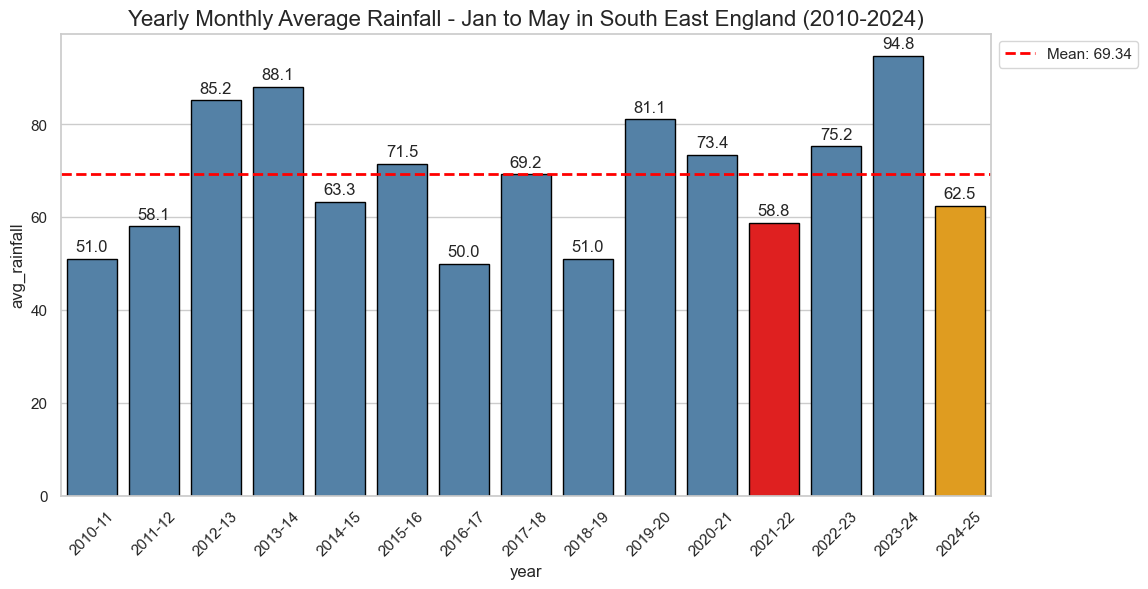

In [32]:
start_year = 2010
latest_yaer = 2024

plot_rainfall(weather_yearly_stats, start_year, latest_yaer, feature='avg_rainfall', special_year=2021, title_label='Yearly Monthly Average Rainfall - Jan to May', year_shift=True)

In [33]:
result = sort_and_highlight_dataframe(
    df=weather_yearly_stats,
    sort_column='avg_rainfall',
    columns_to_display=['weather_year', 'avg_rainfall', 'median_rainfall', 'total_rainfall'],
    highlight_condition=[
        {'condition': {'year': 2024}, 'color': "#ad7712"},  # Recent years in red
        {'condition': {'year': 2021}, 'color': "#D44521"}           # 2010 in teal
    ],
    ascending=True,
    n_rows=7
)

# result.rename(columns = {'weather_year':'Year'})

In [34]:
weather_yearly_stats.columns

Index(['year', 'total_rainfall', 'avg_rainfall', 'median_rainfall',
       'min_rainfall', 'max_rainfall', 'weather_year'],
      dtype='object')

In [35]:
# rainfall_se_jan_to_may[rainfall_se_jan_to_may['year'] >= 2010][['year', 'total_rainfall', 'avg_rainfall', 'median_rainfall']].sort_values(by='total_rainfall', ascending=True).reset_index(drop=True)[:6]

In [36]:
# # Create month order mapping
# month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
#                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# # Function to assign season and season year
# def assign_season(row):
#     month = row['month'].lower()
#     year = row['year']
    
#     if month in ['jun', 'jul', 'aug', 'sep', 'oct', 'nov']:
#         return 'Jun-Nov', year
#     elif month in ['dec', 'jan', 'feb', 'mar', 'apr', 'may']:
#         # For Dec-May season, December belongs to the previous calendar year's season
#         if month == 'dec':
#             return 'Dec-May', year + 1
#         else:
#             return 'Dec-May', year
        
# # Apply the function to create season columns
# df_temp = data_melt.copy()
# df_temp[['semester', 'semester_year']] = df_temp.apply(
#     assign_season, axis=1, result_type='expand'
# )

# df_temp.head()

## ECA&D Website - Daily rainfall

Website: [European Climate Assessment and Dataset](https://www.ecad.eu/)


We have [7 different monitoring stations](https://knmi-ecad-assets-prd.s3.amazonaws.com/download/stations.txt) in the nearby of London that I can take into consideration:

| Station ID | Station Name | Latitude | Longitude | Elevation (in m) |
| ---------- | ------------ | -------- | --------- | ---------------- |
| 459 | LONDON, GB | +51:27:36 | +000:00:00 |   24 |
| 2128 * | LONDON/GATWICK, GB | +51:09:00 | -000:10:48 | 62 |
| 1860 * | HEATHROW,GB | +51:28:44 | -000:26:56 |   25 |
| 16445 * | KEW,GB |+51:28:03 | -000:18:50 |    5 |
| 16444 | LONDONWEATHER CENTRE, GB | +51:31:00 | -000:07:00 | 77 |
| 17476 * | LONDON ST JAMES'S PARK,GB | +51:30:15 |-000:07:45 | 5 |
| 21976 *| LONDON-WEATHER-CENTRE,GB | +51:31:18 | -000:06:42 | 43 |

### Blended vs Non Blended data


From the [ECA&D FAQ page](https://www.ecad.eu/FAQ/index.php#3)

The series collected from participating countries generally do not contain data for the most recent years. This is partly due to the time that is needed for data quality control and archiving at the home institutions of the participants, and partly the result of the efforts required to include the data in the ECA database. To make available for each station a time series that is as complete as possible, we have included an automated update procedure that relies on the daily data from SYNOP messages that are distributed in near real time over the Global Telecommunication System (GTS). In this procedure the gaps in a daily series are also infilled with observations from nearby stations, provided that they are within 12.5km distance and that height differences are less than 25m.

The download options under daily data allow to select blend or non-blend. 

> *The non-blended series are the series as provided by the participants. The blended series underwent the process described above. In case a blended series is chosen, information on the underlying series that are used in the blending process is provided.*

In this notebook, I collected both blended and non blended data for all 5 stations. The idea, is to merge all non blended data (issue of missing data) and see if we come up with a coherent dataset.

In [39]:
def transform_data_datetime(df):
    df = df.copy()
    df['datetime'] = pd.to_datetime(df['DATE'], format="%Y%m%d")
    df['year'] = df['datetime'].dt.year
    df['month int'] = df['datetime'].dt.month
    df['month'] = df['datetime'].dt.strftime('%b')
    df['day'] = df['datetime'].dt.day

    return df

### Gatwick Data

In [40]:
data = pd.read_csv('./data/non_blended/London_Gatwick_2128_RR_SOUID221586.csv')
data.head()

,STAID,SOUID,DATE,RR,Q_RR
0,22607,221586,19890101,10,0
1,22607,221586,19890102,0,0
2,22607,221586,19890103,0,0
3,22607,221586,19890104,14,0
4,22607,221586,19890105,80,0


In [41]:
data_Gatwick_non_blended = transform_data_datetime(data)
data_Gatwick_non_blended.head()

,STAID,SOUID,DATE,RR,Q_RR,datetime,year,month int,month,day
0,22607,221586,19890101,10,0,1989-01-01,1989,1,Jan,1
1,22607,221586,19890102,0,0,1989-01-02,1989,1,Jan,2
2,22607,221586,19890103,0,0,1989-01-03,1989,1,Jan,3
3,22607,221586,19890104,14,0,1989-01-04,1989,1,Jan,4
4,22607,221586,19890105,80,0,1989-01-05,1989,1,Jan,5


### Heathrow Data

As for the Heathrow data, we have 2 dataset available. One covers data starting from 1960, the other one starting from 1980. The first dataset also contains more "reliable" data. I also compared the two dataset to see if they contain measurements that are consistent between each other (in terms of reported precipitation in mm for each day)

In [42]:
data = pd.read_csv('./data/non_blended/London_Heathrow_1860_1_RR_SOUID107650.csv')
data.head()

,STAID,SOUID,DATE,RR,Q_RR
0,1860,107650,19600101,22,0
1,1860,107650,19600102,23,0
2,1860,107650,19600103,7,0
3,1860,107650,19600104,0,0
4,1860,107650,19600105,0,0


In [43]:
data_Heathrow_1_non_blended = transform_data_datetime(data)
data_Heathrow_1_non_blended.head()

,STAID,SOUID,DATE,RR,Q_RR,datetime,year,month int,month,day
0,1860,107650,19600101,22,0,1960-01-01,1960,1,Jan,1
1,1860,107650,19600102,23,0,1960-01-02,1960,1,Jan,2
2,1860,107650,19600103,7,0,1960-01-03,1960,1,Jan,3
3,1860,107650,19600104,0,0,1960-01-04,1960,1,Jan,4
4,1860,107650,19600105,0,0,1960-01-05,1960,1,Jan,5


In [44]:
data = pd.read_csv('./data/non_blended/London_Heathrow_1860_2_RR_SOUID219137.csv')
data.head()

,STAID,SOUID,DATE,RR,Q_RR
0,1860,219137,19800101,0,0
1,1860,219137,19800102,2,0
2,1860,219137,19800103,112,0
3,1860,219137,19800104,22,0
4,1860,219137,19800105,0,0


In [45]:
data_Heathrow_2_non_blended = transform_data_datetime(data)
data_Heathrow_2_non_blended.head()

,STAID,SOUID,DATE,RR,Q_RR,datetime,year,month int,month,day
0,1860,219137,19800101,0,0,1980-01-01,1980,1,Jan,1
1,1860,219137,19800102,2,0,1980-01-02,1980,1,Jan,2
2,1860,219137,19800103,112,0,1980-01-03,1980,1,Jan,3
3,1860,219137,19800104,22,0,1980-01-04,1980,1,Jan,4
4,1860,219137,19800105,0,0,1980-01-05,1980,1,Jan,5


In [46]:
data_Heathrow_1_non_blended[(data_Heathrow_1_non_blended['year'] == 1980) & 
                            (data_Heathrow_1_non_blended['month'] == 'Jul')]['RR'].sum()

593

In [47]:
data_Heathrow_2_non_blended[(data_Heathrow_2_non_blended['year'] == 1980) & 
                            (data_Heathrow_2_non_blended['month'] == 'Jul')]['RR'].sum()

596

In [48]:
test_1980_1 = data_Heathrow_1_non_blended[data_Heathrow_1_non_blended['year'] == 1980]
test_1980_2 = data_Heathrow_2_non_blended[data_Heathrow_2_non_blended['year'] == 1980]

<Axes: xlabel='datetime', ylabel='RR'>

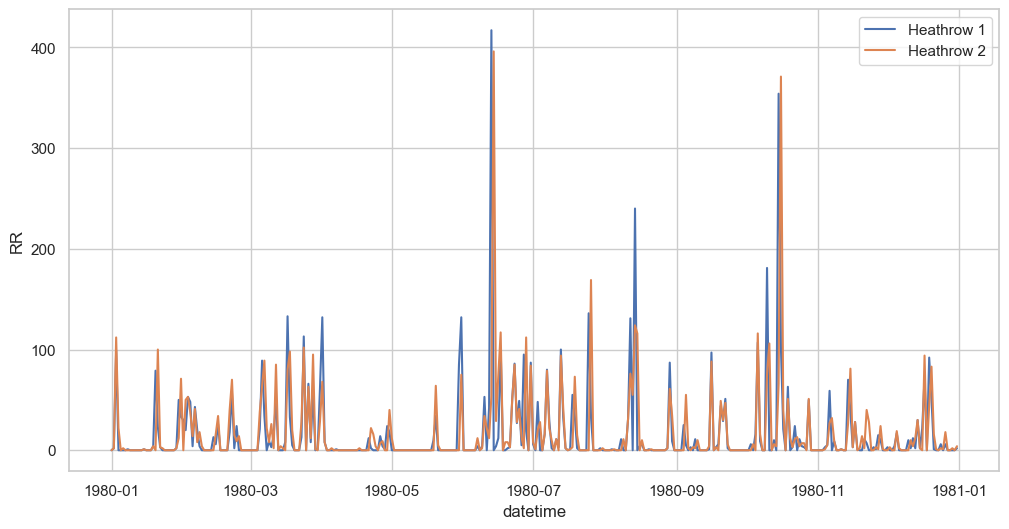

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data = test_1980_1,
    x = 'datetime',
    y = 'RR',
    ax=ax,
    label='Heathrow 1'
)

sns.lineplot(
    data = test_1980_2,
    x = 'datetime',
    y = 'RR',
    ax=ax,
    label='Heathrow 2'
)


### Kew Garden

In [50]:
data = pd.read_csv('./data/non_blended/London_KG_21975_RR_SOUID219141.csv')
print(data.shape)
data.head()

(6514, 5)


,STAID,SOUID,DATE,RR,Q_RR
0,21975,219141,20070701,-9999,9
1,21975,219141,20070702,-9999,9
2,21975,219141,20070703,-9999,9
3,21975,219141,20070704,-9999,9
4,21975,219141,20070705,-9999,9


In [51]:
data_KG_non_blended = transform_data_datetime(data)
data_KG_non_blended.head()

,STAID,SOUID,DATE,RR,Q_RR,datetime,year,month int,month,day
0,21975,219141,20070701,-9999,9,2007-07-01,2007,7,Jul,1
1,21975,219141,20070702,-9999,9,2007-07-02,2007,7,Jul,2
2,21975,219141,20070703,-9999,9,2007-07-03,2007,7,Jul,3
3,21975,219141,20070704,-9999,9,2007-07-04,2007,7,Jul,4
4,21975,219141,20070705,-9999,9,2007-07-05,2007,7,Jul,5


### St. James Park

In [52]:
data = pd.read_csv('./data/non_blended/London_SJP_17476_RR_SOUID219145.csv')
print(data.shape)
data.head()

(9801, 5)


,STAID,SOUID,DATE,RR,Q_RR
0,17476,219145,19980701,-9999,9
1,17476,219145,19980702,0,0
2,17476,219145,19980703,0,0
3,17476,219145,19980704,0,0
4,17476,219145,19980705,0,0


In [53]:
data_SJP_non_blended = transform_data_datetime(data)
data_SJP_non_blended.head()

,STAID,SOUID,DATE,RR,Q_RR,datetime,year,month int,month,day
0,17476,219145,19980701,-9999,9,1998-07-01,1998,7,Jul,1
1,17476,219145,19980702,0,0,1998-07-02,1998,7,Jul,2
2,17476,219145,19980703,0,0,1998-07-03,1998,7,Jul,3
3,17476,219145,19980704,0,0,1998-07-04,1998,7,Jul,4
4,17476,219145,19980705,0,0,1998-07-05,1998,7,Jul,5


In [54]:
data_SJP_non_blended[data_SJP_non_blended['Q_RR'] != 0].shape

(4368, 10)

### London Weather Center

In [55]:
data = pd.read_csv('./data/non_blended/London_WC_21976_RR_SOUID219147.csv')
print(data.shape)
data.head()

(13057, 5)


,STAID,SOUID,DATE,RR,Q_RR
0,21976,219147,19890801,-9999,9
1,21976,219147,19890802,0,0
2,21976,219147,19890803,0,0
3,21976,219147,19890804,-9999,9
4,21976,219147,19890805,-9999,9


In [56]:
data_WC_non_blended = transform_data_datetime(data)
data_WC_non_blended.head()

,STAID,SOUID,DATE,RR,Q_RR,datetime,year,month int,month,day
0,21976,219147,19890801,-9999,9,1989-08-01,1989,8,Aug,1
1,21976,219147,19890802,0,0,1989-08-02,1989,8,Aug,2
2,21976,219147,19890803,0,0,1989-08-03,1989,8,Aug,3
3,21976,219147,19890804,-9999,9,1989-08-04,1989,8,Aug,4
4,21976,219147,19890805,-9999,9,1989-08-05,1989,8,Aug,5


## Data Cleaning

I am starting by considering the St. James Park data (the closest station to where I live) and fill the missing reading with the other available data - Kew Garden first and Heathrow.

In [57]:
data_SJP_non_blended[data_SJP_non_blended['Q_RR'] != 0].shape

(4368, 10)

In [58]:
data_SJP_non_blended[data_SJP_non_blended['Q_RR'] != 0].shape[0]/ data_SJP_non_blended.shape[0]

0.44566880930517294

In [59]:
data_KG_non_blended[data_KG_non_blended['Q_RR'] != 0].shape[0]/ data_KG_non_blended.shape[0]

0.3773411114522567

In [60]:
data_SJP_non_blended['datetime'].min()

Timestamp('1998-07-01 00:00:00')

In [61]:
data_KG_non_blended['datetime'].min()

Timestamp('2007-07-01 00:00:00')

In [62]:
data_SJP_2010 = data_SJP_non_blended[data_SJP_non_blended['datetime'] > '2010-01-01'].copy()
data_KG_2010 = data_KG_non_blended[data_KG_non_blended['datetime'] > '2010-01-01'].copy()
print(data_SJP_2010.shape, data_KG_2010.shape)

(5598, 10) (5598, 10)


In [63]:
data_SJP_2010[data_SJP_2010['Q_RR'] != 0].shape

(2245, 10)

In [64]:
data_KG_2010[data_KG_2010['Q_RR'] != 0].shape

(2202, 10)

<Axes: xlabel='datetime', ylabel='RR'>

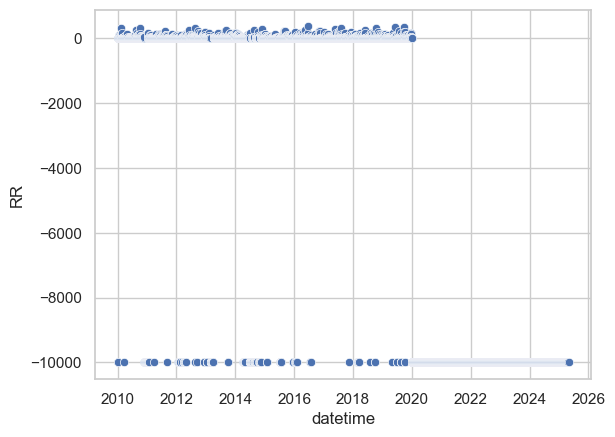

In [65]:
sns.scatterplot(
    data=data_KG_2010,
    x='datetime',
    y='RR'
    )

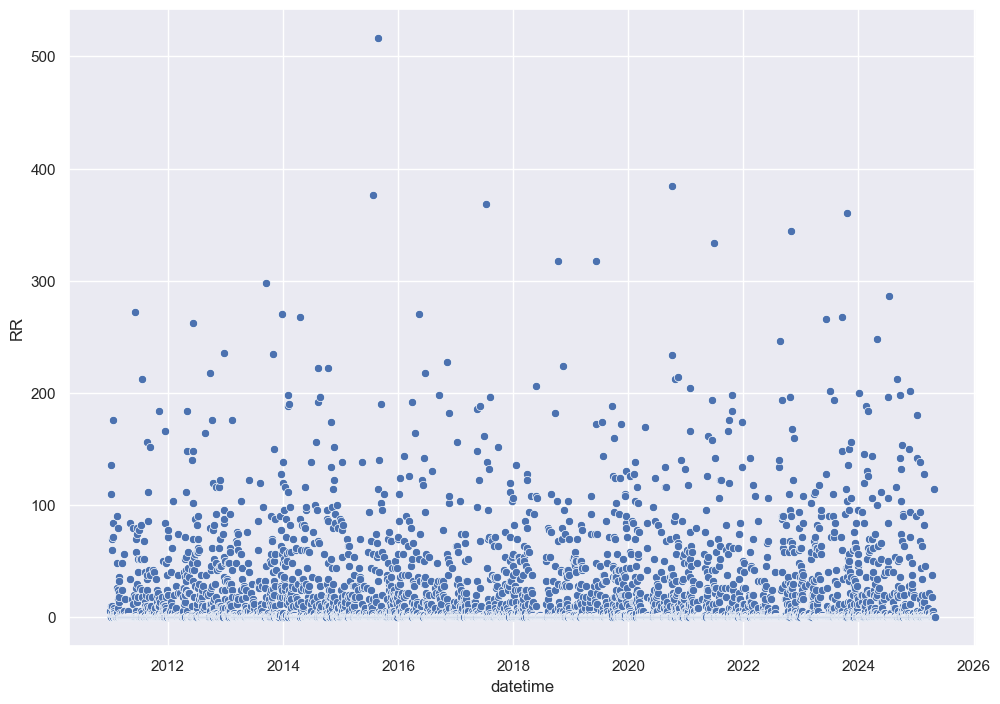

In [66]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(
    data=data_Heathrow_1_non_blended[data_Heathrow_1_non_blended['year'] > 2010],
    x='datetime',
    y='RR'
    );

So, basically, after searching data for hours, I came to the conclusion that the best dataset for my purpose was just the one from Heathrow as it doesn't contain any ureliable data. All inconsistent data are prior of 2010.

> Lesson learned: Set up your constrains and then check if the data fit the purpose as soon as you download it

In [67]:
data_Heathrow_1_non_blended[data_Heathrow_1_non_blended['Q_RR'] != 0]

,STAID,SOUID,DATE,RR,Q_RR,datetime,year,month int,month,day
13300,1860,107650,19960531,-9999,9,1996-05-31,1996,5,May,31
13683,1860,107650,19970618,-9999,9,1997-06-18,1997,6,Jun,18
13684,1860,107650,19970619,-9999,9,1997-06-19,1997,6,Jun,19
13685,1860,107650,19970620,-9999,9,1997-06-20,1997,6,Jun,20
13686,1860,107650,19970621,-9999,9,1997-06-21,1997,6,Jun,21
13687,1860,107650,19970622,-9999,9,1997-06-22,1997,6,Jun,22
13688,1860,107650,19970623,-9999,9,1997-06-23,1997,6,Jun,23
13689,1860,107650,19970624,-9999,9,1997-06-24,1997,6,Jun,24
13690,1860,107650,19970625,-9999,9,1997-06-25,1997,6,Jun,25
13691,1860,107650,19970626,-9999,9,1997-06-26,1997,6,Jun,26


In [68]:
rainfall_data = data_Heathrow_1_non_blended[(data_Heathrow_1_non_blended['year'] >= 2010) & (data_Heathrow_1_non_blended['year'] <2025)].copy() 

rainfall_data.month = pd.Categorical(
    rainfall_data.month,
    categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered=True
)

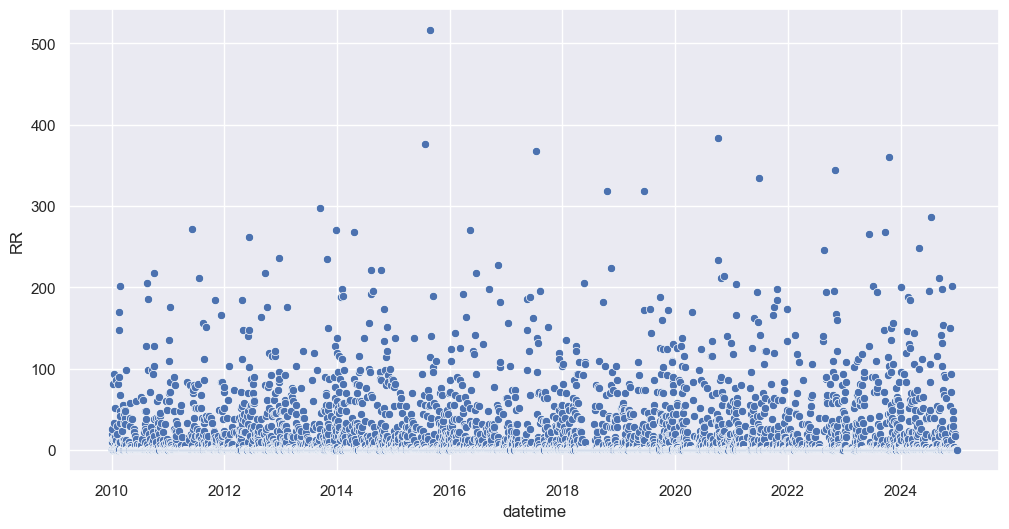

In [69]:
sns.set_theme(rc={'figure.figsize':(12.,6.)})

sns.scatterplot(
    data=rainfall_data,
    x='datetime',
    y='RR'
    );

In [70]:
print(rainfall_data['datetime'].min())
print(rainfall_data['datetime'].max())

2010-01-01 00:00:00
2024-12-31 00:00:00


In [71]:
precipitation_by_year_month = (rainfall_data
 .groupby(['year', 'month'], observed=False)
 .agg
 (
     precipitation_sum=('RR', 'sum'),
     precipitation_mean=('RR', 'mean'),
     precipitation_std=('RR', 'std'),
     precipitation_median=('RR', 'median'),
     precipitation_max=('RR', 'max'),
     precipitation_min=('RR', 'min')
 )
 ).reset_index()

In [72]:
precipitation_by_year_month.head()

,year,month,precipitation_sum,precipitation_mean,precipitation_std,precipitation_median,precipitation_max,precipitation_min
0,2010,Jan,518,16.709677,26.318806,4.0,94,0
1,2010,Feb,1004,35.857143,55.136003,8.0,202,0
2,2010,Mar,398,12.838710,19.278826,0.0,56,0
3,2010,Apr,232,7.733333,20.025731,0.0,98,0
4,2010,May,206,6.645161,14.499537,0.0,58,0


In [73]:
rainfall_data[(rainfall_data['year'] == 2010) & (rainfall_data['month'] == 'Jan')]['RR'].sum()

518

In [74]:
rainfall_data[(rainfall_data['year'] == 2010) & (rainfall_data['month'] == 'Jan')]['RR'].mean()

16.70967741935484

In [75]:
data = pd.read_csv('./data/south_east_rainfall.csv')

data.columns = data.columns.str.strip()
string_columns = data.select_dtypes(include=['object']).columns
data[string_columns] = data[string_columns].apply(pd.to_numeric, errors='coerce')
data_melt = data[['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']].melt(id_vars='year',var_name='month', value_name='value').sort_values(by='year')
data_melt['month'] = pd.Categorical(data_melt['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)

In [76]:
rainfall_data_south_east = data_melt[(data_melt['year'] >= 2010) & (data_melt['year'] < 2025)].sort_values(by=['year', 'month']).reset_index(drop=True)

In [77]:
rainfall_data_heathrow = precipitation_by_year_month.copy()
rainfall_data_heathrow.head()

,year,month,precipitation_sum,precipitation_mean,precipitation_std,precipitation_median,precipitation_max,precipitation_min
0,2010,Jan,518,16.709677,26.318806,4.0,94,0
1,2010,Feb,1004,35.857143,55.136003,8.0,202,0
2,2010,Mar,398,12.838710,19.278826,0.0,56,0
3,2010,Apr,232,7.733333,20.025731,0.0,98,0
4,2010,May,206,6.645161,14.499537,0.0,58,0


In [78]:
rainfall_data_south_east.head()

,year,month,value
0,2010,jan,66.9
1,2010,feb,77.6
2,2010,mar,51.5
3,2010,apr,23.9
4,2010,may,32.3


In [79]:
rainfall_data_heathrow.dtypes

year                       int32
month                   category
precipitation_sum          int64
precipitation_mean       float64
precipitation_std        float64
precipitation_median     float64
precipitation_max          int64
precipitation_min          int64
dtype: object

In [80]:
rainfall_data_south_east['month'] = rainfall_data_south_east['month'].str.capitalize()  # jan -> Jan
# df['datetime'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

In [81]:
rainfall_data_south_east['datetime'] = pd.to_datetime(rainfall_data_south_east['year'].astype(str) + '-' + rainfall_data_south_east['month'] + '-01', format='%Y-%b-%d')

In [82]:
rainfall_data_heathrow['datetime'] = pd.to_datetime(rainfall_data_heathrow['year'].astype(str) + '-' + rainfall_data_heathrow['month'].astype(str) + '-01', format='%Y-%b-%d')
# rainfall_data_south_east.dtypes

In [83]:
rainfall_data_heathrow

,year,month,precipitation_sum,precipitation_mean,precipitation_std,precipitation_median,precipitation_max,precipitation_min,datetime
0,2010,Jan,518,16.709677,26.318806,4.0,94,0,2010-01-01
1,2010,Feb,1004,35.857143,55.136003,8.0,202,0,2010-02-01
2,2010,Mar,398,12.838710,19.278826,0.0,56,0,2010-03-01
3,2010,Apr,232,7.733333,20.025731,0.0,98,0,2010-04-01
4,2010,May,206,6.645161,14.499537,0.0,58,0,2010-05-01
...,...,...,...,...,...,...,...,...,...
175,2024,Aug,284,9.161290,23.510419,0.0,116,0,2024-08-01
176,2024,Sep,1148,38.266667,59.805970,12.0,212,0,2024-09-01
177,2024,Oct,572,18.451613,36.297694,2.0,154,0,2024-10-01
178,2024,Nov,622,20.733333,48.530071,0.0,202,0,2024-11-01


In [84]:
rainfall_heathrow = rainfall_data_heathrow[['datetime', 'precipitation_sum', 'precipitation_mean']].rename(
    columns={
        'precipitation_sum': 'Heathrow Sum',
        'precipitation_mean': 'Heathrow Mean'
    }
)

rainfall_south_east = rainfall_data_south_east[['datetime', 'value']].rename(
    columns={
        'value': 'South East Sum'
    }
)

In [85]:
rainfall_heathrow.head()

,datetime,Heathrow Sum,Heathrow Mean
0,2010-01-01,518,16.709677
1,2010-02-01,1004,35.857143
2,2010-03-01,398,12.838710
3,2010-04-01,232,7.733333
4,2010-05-01,206,6.645161


In [86]:
rainfall_south_east.head()

,datetime,South East Sum
0,2010-01-01,66.9
1,2010-02-01,77.6
2,2010-03-01,51.5
3,2010-04-01,23.9
4,2010-05-01,32.3


In [87]:
rainfall_compare = rainfall_heathrow.merge(
    rainfall_south_east,
    on='datetime',
    how='outer'
)

In [88]:
rainfall_compare[['Heathrow Sum', 'South East Sum']].corr()

,Heathrow Sum,South East Sum
Heathrow Sum,1.000000,0.897592
South East Sum,0.897592,1.000000


In [89]:
rainfall_compare[['Heathrow Mean', 'South East Sum']].corr()

,Heathrow Mean,South East Sum
Heathrow Mean,1.000000,0.895298
South East Sum,0.895298,1.000000


<Axes: xlabel='datetime', ylabel='Heathrow Sum'>

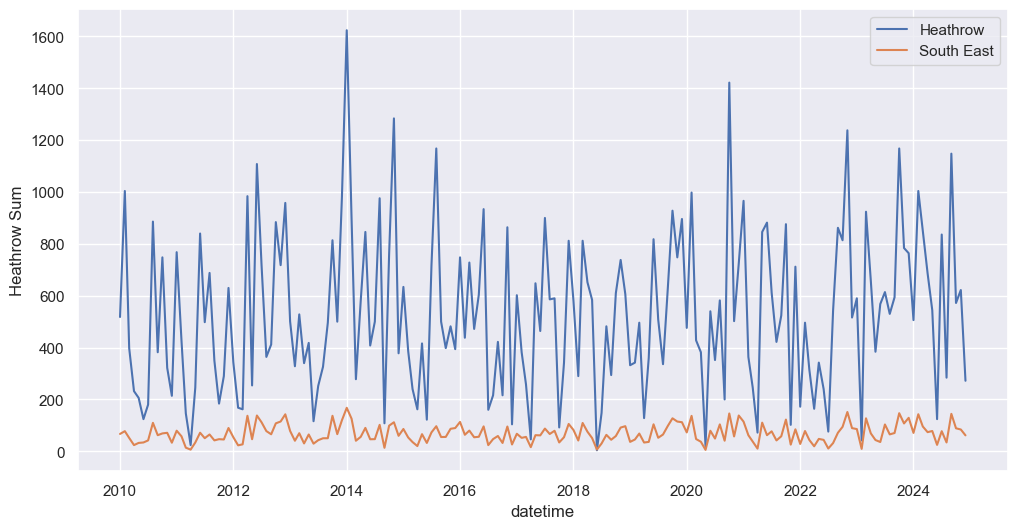

In [92]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data = rainfall_compare,
    x = 'datetime',
    y = 'Heathrow Sum',
    ax=ax,
    label='Heathrow'
)

sns.lineplot(
    data = rainfall_compare,
    x = 'datetime',
    y = 'South East Sum',
    ax=ax,
    label='South East'
)


In [122]:
rainfall_heathrow

,datetime,Heathrow Sum,Heathrow Mean
0,2010-01-01,518,16.709677
1,2010-02-01,1004,35.857143
2,2010-03-01,398,12.838710
3,2010-04-01,232,7.733333
4,2010-05-01,206,6.645161
...,...,...,...
175,2024-08-01,284,9.161290
176,2024-09-01,1148,38.266667
177,2024-10-01,572,18.451613
178,2024-11-01,622,20.733333


In [96]:
rainfall_data_heathrow[(rainfall_data_heathrow['year'] == 2010) &
                       (rainfall_data_heathrow['month'] == 'Jan')]

,year,month,precipitation_sum,precipitation_mean,precipitation_std,precipitation_median,precipitation_max,precipitation_min,datetime
0,2010,Jan,518,16.709677,26.318806,4.0,94,0,2010-01-01


In [97]:
rainfall_heathrow

,datetime,Heathrow Sum,Heathrow Mean
0,2010-01-01,518,16.709677
1,2010-02-01,1004,35.857143
2,2010-03-01,398,12.838710
3,2010-04-01,232,7.733333
4,2010-05-01,206,6.645161
...,...,...,...
175,2024-08-01,284,9.161290
176,2024-09-01,1148,38.266667
177,2024-10-01,572,18.451613
178,2024-11-01,622,20.733333


In [101]:
heathrow_data = transform_data_datetime(data_Heathrow_1_non_blended)

In [121]:
heathrow_data[(heathrow_data['year'] == 2015) & (heathrow_data['month'] == 'Jan')]['RR'].sum()

634

In [110]:
rainfall_data_se[(rainfall_data_se['year'] == 2015)]

,year,month,rainfall,season,assign_weather_year,water_year
1699,2015,sep,67.5,autumn,2015,2015
179,2015,jan,96.5,winter,2014,2014
749,2015,apr,18.5,spring,2014,2014
2079,2015,nov,77.5,autumn,2015,2015
2269,2015,dec,80.1,winter,2015,2015
1129,2015,jun,26.4,summer,2015,2015
559,2015,mar,23.4,spring,2014,2014
1319,2015,jul,59.8,summer,2015,2015
369,2015,feb,58.6,winter,2014,2014
1889,2015,oct,58.0,autumn,2015,2015


In [109]:
rainfall_data_se.head(2)

,year,month,rainfall,season,assign_weather_year,water_year
0,1836,jan,67.7,winter,1835,1835
570,1836,apr,90.7,spring,1835,1835


In [ ]:
data_Heathrow_1_non_blended

,STAID,SOUID,DATE,RR,Q_RR,datetime,year,month int,month,day
0,1860,219137,19800101,0,0,1980-01-01,1980,1,Jan,1
1,1860,219137,19800102,2,0,1980-01-02,1980,1,Jan,2
2,1860,219137,19800103,112,0,1980-01-03,1980,1,Jan,3
3,1860,219137,19800104,22,0,1980-01-04,1980,1,Jan,4
4,1860,219137,19800105,0,0,1980-01-05,1980,1,Jan,5
...,...,...,...,...,...,...,...,...,...,...
16552,1860,219137,20250426,-9999,9,2025-04-26,2025,4,Apr,26
16553,1860,219137,20250427,-9999,9,2025-04-27,2025,4,Apr,27
16554,1860,219137,20250428,-9999,9,2025-04-28,2025,4,Apr,28
16555,1860,219137,20250429,-9999,9,2025-04-29,2025,4,Apr,29


In [ ]:
# rainfall_data.corr()

### Blended - St James park and London central

In [ ]:
# St. James park data BLENDED
data_sjp_blended = pd.read_csv('./data/RR_STAID017476_blended.csv')
# Convert the 'DATE' column to datetime format
data_sjp_blended['datetime'] = pd.to_datetime(data_sjp_blended['DATE'], format="%Y%m%d")
# Creating year, month, and day columns 
data_sjp_blended['year'] = data_sjp_blended['datetime'].dt.year
data_sjp_blended['month int'] = data_sjp_blended['datetime'].dt.month
data_sjp_blended['month'] = data_sjp_blended['datetime'].dt.strftime('%b')
data_sjp_blended['day'] = data_sjp_blended['datetime'].dt.day
# display the first few rows of the dataframe
print(data_sjp_blended.shape)
data_sjp_blended.head()

In [ ]:
# London park data BLENDED
data_lon_blended = pd.read_csv('./data/London_blended_RR_STAID021976.csv')
# Convert the 'DATE' column to datetime format
data_lon_blended['datetime'] = pd.to_datetime(data_lon_blended['DATE'], format="%Y%m%d")
# Creating year, month, and day columns 
data_lon_blended['year'] = data_lon_blended['datetime'].dt.year
data_lon_blended['month int'] = data_lon_blended['datetime'].dt.month
data_lon_blended['month'] = data_lon_blended['datetime'].dt.strftime('%b')
data_lon_blended['day'] = data_lon_blended['datetime'].dt.day
# display the first few rows of the dataframe
print(data_lon_blended.shape)
data_lon_blended.head()

In [ ]:
# London park data NON BLENDED
data_lon_non_blended = pd.read_csv('./data/London_non_blended_RR_SOUID219147.csv')
# Convert the 'DATE' column to datetime format
data_lon_non_blended['datetime'] = pd.to_datetime(data_lon_non_blended['DATE'], format="%Y%m%d")
# Creating year, month, and day columns 
data_lon_non_blended['year'] = data_lon_non_blended['datetime'].dt.year
data_lon_non_blended['month int'] = data_lon_non_blended['datetime'].dt.month
data_lon_non_blended['month'] = data_lon_non_blended['datetime'].dt.strftime('%b')
data_lon_non_blended['day'] = data_lon_non_blended['datetime'].dt.day
# display the first few rows of the dataframe
print(data_lon_non_blended.shape)
data_lon_non_blended.head()

In [ ]:
# London Kew Garded data NON BLENDED
data_KG_non_blended = pd.read_csv('./data/London_KG_non_blended_RR_SOUID219141.csv')
# Convert the 'DATE' column to datetime format
data_KG_non_blended['datetime'] = pd.to_datetime(data_KG_non_blended['DATE'], format="%Y%m%d")
# Creating year, month, and day columns 
data_KG_non_blended['year'] = data_KG_non_blended['datetime'].dt.year
data_KG_non_blended['month int'] = data_KG_non_blended['datetime'].dt.month
data_KG_non_blended['month'] = data_KG_non_blended['datetime'].dt.strftime('%b')
data_KG_non_blended['day'] = data_KG_non_blended['datetime'].dt.day
# display the first few rows of the dataframe
print(data_KG_non_blended.shape)
data_KG_non_blended.head()

In [ ]:
data_lon_non_blended[data_lon_non_blended['Q_RR'] != 0].shape

In [ ]:
(data_sjp_blended
 .groupby(['year', 'month int'])
 .agg({'RR': 'sum'})
).reset_index()[45:55]

In [ ]:
(data_lon_blended
 .groupby(['year', 'month int'])
 .agg({'RR': 'sum'})
).reset_index()[152:162]

In [ ]:
data_lon_blended[data_lon_blended['datetime'].isin(list(data_sjp_blended[data_sjp_blended['Q_RR'] != 0]['datetime'].values))].tail()

In [ ]:
data_lon_non_blended[data_lon_non_blended['datetime'].isin(list(data_sjp_blended[data_sjp_blended['Q_RR'] != 0]['datetime'].values))].head()

In [ ]:
data_KG_non_blended[(data_KG_non_blended['datetime'].isin(list(data_sjp_blended[data_sjp_blended['Q_RR'] != 0]['datetime'].values))) & 
                    (data_KG_non_blended['Q_RR'] == 0)]

## Met Office Data

- [Met Office Websise](https://www.metoffice.gov.uk/research/climate/maps-and-data/historic-station-data)
- [London Heathrow](https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/heathrowdata.txt)